# ARIMA

Import and examine the data from the CSV file <br>
Model the data using an ARIMA model <br>
Make predictions with the fitted model <br>
Compare the performance of this ARIMA model 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

import warnings
warnings.simplefilter('ignore')

%matplotlib inline

C:\Users\sande\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [6]:
temp_df = pd.read_csv('C:/Users/sande/Major Project/Dataset/GlobalTemperatures.csv')

In [7]:
temp_df['dt'] = pd.to_datetime(temp_df['dt'])
temp_df.set_index('dt', inplace = True)
temp_df.dropna(how = 'any', inplace = True)
temp_df.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367
1850-02-01,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414
1850-03-01,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341
1850-04-01,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267
1850-05-01,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249


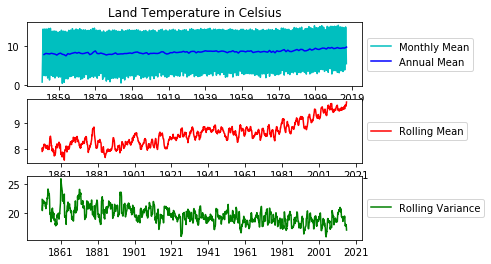

Results of Dickey-Fuller Test on Monthly Mean:
Test Statistic                   -1.455328
p-value                           0.555483
#Lags Used                       26.000000
Number of Observations Used    1965.000000
Critical Value (1%)              -3.433682
Critical Value (5%)              -2.863012
Critical Value (10%)             -2.567554
dtype: float64


In [8]:
fig = plt.figure()

plt.subplot(311)
plt.title('Land Temperature in Celsius')
plt.plot(temp_df['LandAverageTemperature'], color = 'c', label = 'Monthly Mean')
plt.plot(temp_df['LandAverageTemperature'].resample('A').mean(), color = 'b', label = 'Annual Mean')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Adding rolling mean
rolmean = pd.rolling_mean(temp_df['LandAverageTemperature'], window=12)
rolvar = pd.rolling_var(temp_df['LandAverageTemperature'], window=12)

plt.subplot(312)
plt.plot(rolmean, label = 'Rolling Mean', color = 'r')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.subplot(313)
plt.plot(rolvar, label = 'Rolling Variance', color = 'g')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

# Augmented Dickey-Fuller Test for stationarity.
def stationarity_test(series, name = None):
    if name != None:
        print('Results of Dickey-Fuller Test on %s:'%name)
    else:
        print('Results of Dickey-Fuller Test:')
    
    df_test = sm.tsa.stattools.adfuller(series)
    df_result = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in df_test[4].items():
        df_result['Critical Value (%s)'%key] = value
    print(df_result)

stationarity_test(temp_df['LandAverageTemperature'], 'Monthly Mean')

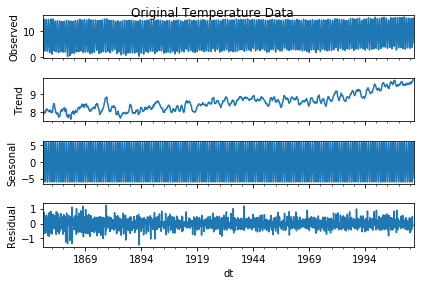

In [9]:
decomposition = sm.tsa.seasonal_decompose(temp_df['LandAverageTemperature'], model='additive')  
fig = plt.figure()  
fig = decomposition.plot()
plt.suptitle('Original Temperature Data')

In [10]:
temp_diff12 =temp_df['LandAverageTemperature'] - temp_df['LandAverageTemperature'].shift(12)
temp_diff12.dropna(inplace = True)
stationarity_test(temp_diff12, 'Temperature - 12 Month Difference')

Results of Dickey-Fuller Test on Temperature - 12 Month Difference:
Test Statistic                -1.278337e+01
p-value                        7.334162e-24
#Lags Used                     2.400000e+01
Number of Observations Used    1.955000e+03
Critical Value (1%)           -3.433699e+00
Critical Value (5%)           -2.863020e+00
Critical Value (10%)          -2.567558e+00
dtype: float64


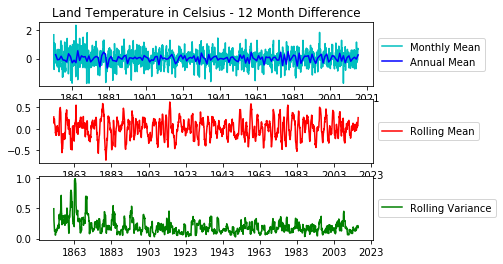

In [11]:
fig = plt.figure()

plt.subplot(311)
plt.title('Land Temperature in Celsius - 12 Month Difference')
plt.plot(temp_diff12, color = 'c', label = 'Monthly Mean')
plt.plot(temp_diff12.resample('A').mean(), color = 'b', label = 'Annual Mean')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Adding rolling mean
rolmean = pd.rolling_mean(temp_diff12, window=12)
rolvar = pd.rolling_var(temp_diff12, window=12)

plt.subplot(312)
plt.plot(rolmean, label = 'Rolling Mean', color = 'r')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.subplot(313)
plt.plot(rolvar, label = 'Rolling Variance', color = 'g')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

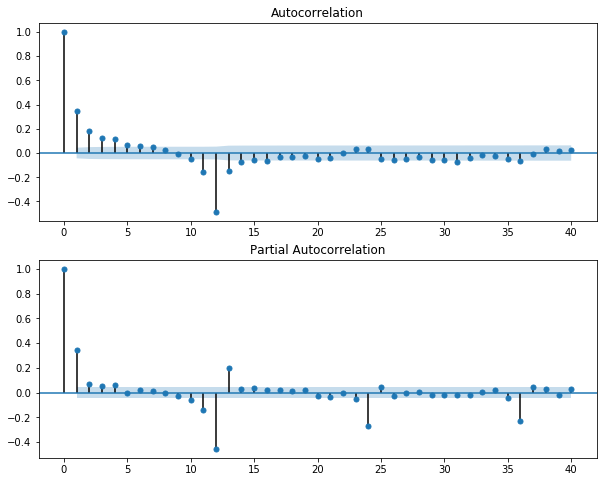

In [12]:
fig = plt.figure(figsize = (10, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(temp_diff12, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(temp_diff12, lags=40, ax=ax2)

In [13]:
import itertools
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq_parameter_list = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq_parameter_list[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq_parameter_list[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq_parameter_list[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq_parameter_list[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [15]:
for param_in_pdq in pdq_parameter_list:
    for param_in_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(temp_df['LandAverageTemperature'],
                                            order=param_in_pdq,
                                            seasonal_order=param_in_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC Score:{}'.format(param_in_pdq, param_in_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC Score:12071.555258261513
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC Score:1718.8843462796708
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC Score:2726.5248355473323
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC Score:1710.935033008415
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC Score:2159.423637592796
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC Score:1718.1731212369036
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC Score:12086.072037326961
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC Score:9796.850612654673
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC Score:2498.3039225443017
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC Score:1455.4123293896794
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC Score:2517.9985894151077
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC Score:1449.247371732641
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC Score:1923.5460586042423
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC Score:1456.2188068569099
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC Score:6933.155112353312
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC Score:1967.359682601347
ARIMA(0, 1, 0)

In [16]:
mod202 = sm.tsa.statespace.SARIMAX(temp_df['LandAverageTemperature'], order = (2, 0, 2), 
                                   seasonal_order=(0,1,1,12), enforce_stationarity = False, 
                                   enforce_invertibility = False).fit()
print('Model', 'AIC', 'BIC', 'HQIC')
print('ARIMA(2,0,2)x(0,1,1)_12', mod202.aic, mod202.bic, mod202.hqic)

Model AIC BIC HQIC
ARIMA(2,0,2)x(0,1,1)_12 1249.70454292 1283.28590954 1262.03741736


In [17]:
print(mod202.summary())

                                 Statespace Model Results                                 
Dep. Variable:             LandAverageTemperature   No. Observations:                 1992
Model:             SARIMAX(2, 0, 2)x(0, 1, 1, 12)   Log Likelihood                -618.852
Date:                            Sun, 22 Apr 2018   AIC                           1249.705
Time:                                    16:23:34   BIC                           1283.286
Sample:                                01-01-1850   HQIC                          1262.037
                                     - 12-01-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5564      0.055     28.140      0.000       1.448       1.665
ar.L2         -0.5575      0.055   

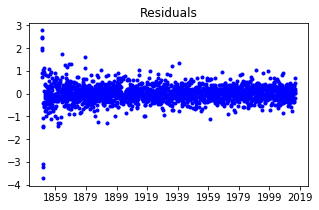

In [18]:
fig = plt.figure(figsize = (5, 3))
resid202 = mod202.resid
plt.plot(resid202, 'b.')
plt.title('Residuals')
plt.show()

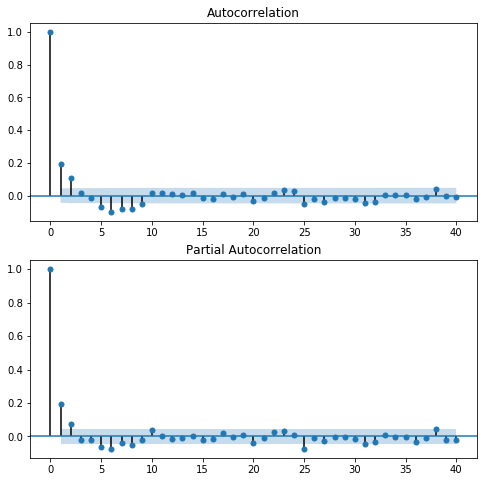

In [19]:
fig = plt.figure(figsize = (8, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid202, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid202, lags=40, ax=ax2)

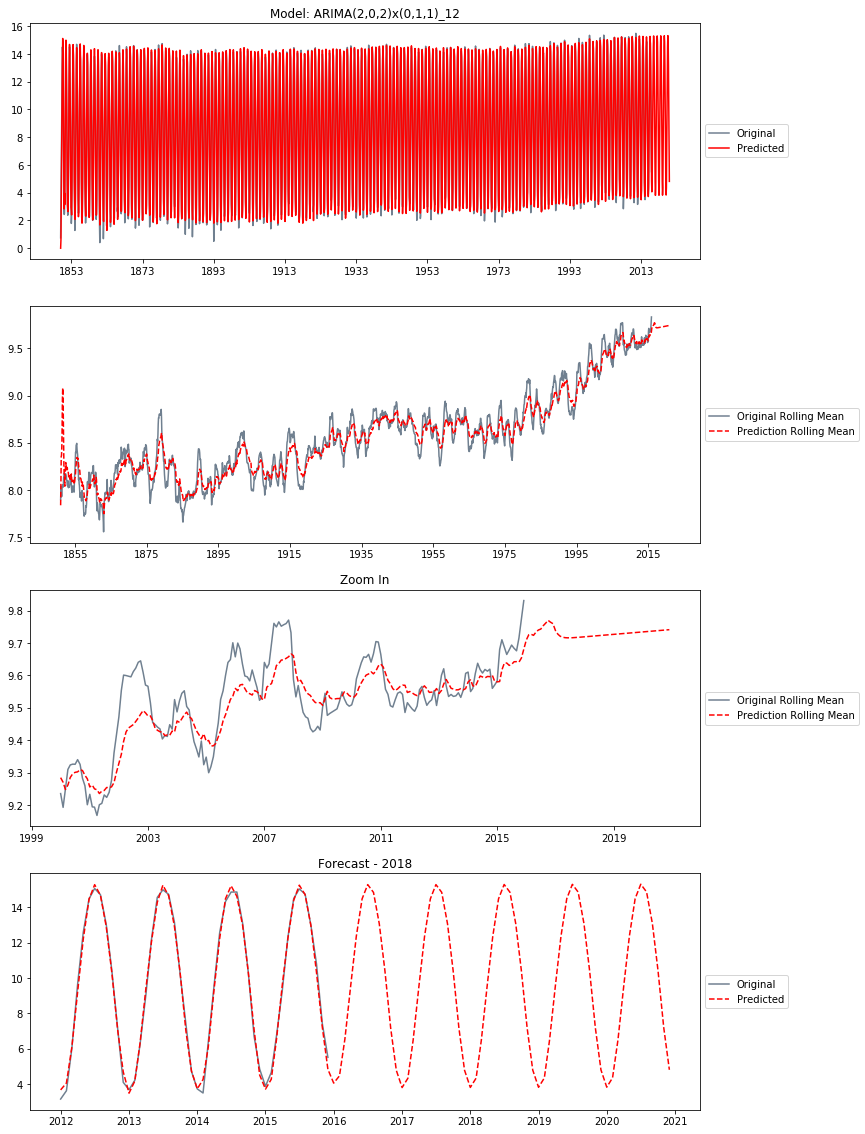

In [20]:
predict_mod202 = mod202.predict('1850-01-01', '2020-12-01')

fig, axs = plt.subplots(4, figsize = (12, 20))
axs[0].set_title('Model: ARIMA(2,0,2)x(0,1,1)_12')
axs[0].plot(temp_df['LandAverageTemperature'], color = 'slategray', label = 'Original')
axs[0].plot(predict_mod202, color = 'red', label = 'Predicted')
axs[0].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


predict_rolmean = pd.rolling_mean(predict_mod202, window=12)
original_rolmean = pd.rolling_mean(temp_df['LandAverageTemperature'], window=12)

axs[1].plot(original_rolmean, color = 'slategray', label = 'Original Rolling Mean')
axs[1].plot(predict_rolmean, color = 'red', linestyle = '--', label='Prediction Rolling Mean')
axs[1].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

axs[2].set_title('Zoom In')
axs[2].plot(original_rolmean['2000':], color = 'slategray', label = 'Original Rolling Mean')
axs[2].plot(predict_rolmean['2000':], color = 'red', linestyle = '--', label='Prediction Rolling Mean')
axs[2].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

axs[3].set_title('Forecast - 2018')
axs[3].plot(temp_df['LandAverageTemperature']['2012':'2020'], color = 'slategray', label = 'Original')
axs[3].plot(predict_mod202['2012':'2020'], color='red', linestyle = '--', label = 'Predicted')
axs[3].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))